## Add concept and it's status 

## Create the network with same structure
1. Create a simple network
2. Give a class build initial network 

Parameters:
 - `base_graph` Copy the network structure from the base graph
 - `concept` Give the concept holding in this graph
 - `threshold` Init_threshold for first iteration.
 - `number` Seed node number generated randomly
 
Return:
 - `modle` For further iteration
 - `graph` For extrecting and modifying the attribuate in every node or edges.
 
Things need modifying:
 - `initial_set` need to be move out og this class and build independent class for more algorithm
 

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc

In [ ]:
base_graph = nx.fast_gnp_random_graph(n=10, p=0.8)

In [ ]:
class single_spreading:
    def __init__(self, concept, base_graph, init_threshold, seed_number, iteration=0):
        self.concept = concept
        self.base_graph = base_graph
        self.threshold = init_threshold
        self.seed_number = seed_number
        self.model, self.graph, self.initial_set = self.model_init(self.base_graph, self.concept, self.threshold, iteration)
        self.effected_node = []  
        
    def getModel(self):
        return self.model
    
    def getGraph(self):
        return self.graph
    
    def getEffectedNode(self):
        if effected_node is empty:
            print("There is no effected node, check the process")
        else:
            return self.effected_node
        
    def getSeedNode(self):
        return self.initial_set
    
    def seed_seletion(self, number):
        # Generate a random initial set of nodes
        num_initial_nodes = number 
        nodes_list = list(self.graph.nodes())
        initial_set = random.sample(nodes_list, num_initial_nodes)
        print("Initial seed set randomly generated as:", initial_set)
        return initial_set
    
    def update_concept(self, node_list):
        #updating concept status changing during each iteration
        for n in self.graph.nodes():
            if n in node_list:
                nx.set_node_attributes(self.graph, {n: True}, name = self.concept)

    def model_init(self):
        # Copying the base graph
        graph = self.base_graph.copy()

        # Initialize the concept attribute to each node in graph
        concept_attribute = False
        nx.set_node_attributes(graph, concept_attribute, name = self.concept)

        # Model selection
        model = ep.IndependentCascadesModel(graph)

        # Model Configuration
        config = mc.Configuration()

        # Initialize the attribuate of edges in both model config and graph
        for edge in graph.edges():
            config.add_edge_configuration("threshold", edge, self.threshold)
            graph[edge[0]][edge[1]]["threshold"] = self.threshold

        # Get a random initial set of nodes from seed_seletion(graph, seed_number)
        self.initial_set = seed_seletion(graph, seed_number)

        update_concept(graph, self.concept, self.initial_set)    

        # Set the status of initial set of nodes as infected in the model config
        config.add_model_initial_configuration("Infected", initial_set)

        # Using config, initialize the IC model
        model.set_initial_status(config)

        # The first iteration will generate the initialization and add all settings in config to the graph
        iterations = model.iteration_bunch(1)
        print(iterations)

        return model, graph, initial_set

    def iterations_with_updating(times, model, graph):
        #updating the concept
        for i in range(times):
            iterations = model.iteration_bunch(1)
            activate_node = []
            inactivated_node = []
            for i, iteration in enumerate(iterations):
                print(iteration)
                for node ,statu in iteration["status"].items():
                    if statu == 1:
                        activate_node.append(node)
                    elif statu == 2:
                        inactivated_node.append(node)
                        effected_node.append(node)
                update_concept(graph, next(iter(graph.nodes(data=True)[0])), activate_node)
                print(activate_node)
                print(inactivated_node)
                print(effected_node)

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc


# Randomly create the base graph
base_graph = nx.fast_gnp_random_graph(n=10, p=0.8)
effected_node = []

def seed_seletion(g, number):
    # Generate a random initial set of nodes
    num_initial_nodes = number 
    nodes_list = list(g.nodes())
    initial_set = random.sample(nodes_list, num_initial_nodes)
    print("Initial seed set randomly generated as:", initial_set)
    return initial_set

def update_concept(g, concept_name, node_list):
    #updating concept status changing during each iteration
    for n in g.nodes():
        if n in node_list:
            nx.set_node_attributes(g, {n: True}, name=concept_name)

def update_threshold(g, concept_name, edge_list):
    #updating threshold status changing during each iteration
    for n in g.edges():
        if n in edge_list:
            g[e[0]][e[1]]["threshold"] = n

def model_init(base_graph, concept, threshold, number):
    # Create graph by copying the base graph
    g = base_graph.copy()

    # Initialize the concept attribute to each node in graph
    concept_attribute = False
    nx.set_node_attributes(g, concept_attribute, name=concept)

    # Model selection
    model = ep.IndependentCascadesModel(g)

    # Model Configuration
    config = mc.Configuration()

    # Setting the edge parameters in the model config
    for e in g.edges():
        config.add_edge_configuration("threshold", e, threshold)
        g[e[0]][e[1]]["threshold"] = threshold

    # Get a random initial set of nodes from seed_seletion(g, number)
    initial_set = seed_seletion(g, number)

    
    update_concept(g, concept, initial_set)    
        
    # Set the status of initial set of nodes as infected in the model config
    config.add_model_initial_configuration("Infected", initial_set)

    # Using config, initialize the IC model
    model.set_initial_status(config)

    # The first iteration will generate the initialization and add all settings in config to the graph
    iterations = model.iteration_bunch(1)
    print(iterations)

    return model, g, initial_set

def iterations_with_updating(times, model, graph):
    for i in range(times):
        iterations = model.iteration_bunch(1)
        activate_node = []
        inactivated_node = []
        for i, iteration in enumerate(iterations):
            print(iteration)
            for node ,statu in iteration["status"].items():
                if statu == 1:
                    activate_node.append(node)
                elif statu == 2:
                    inactivated_node.append(node)
                    effected_node.append(node)
            update_concept(graph, next(iter(graph.nodes(data=True)[0])), activate_node)
            print(activate_node)
            print(inactivated_node)
            print(effected_node)

In [4]:
model_1, g_1, initial_set_1 = model_init(base_graph, "cat", 0.4, 2)

Initial seed set randomly generated as: [0, 5]
[{'iteration': 0, 'status': {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}, 'node_count': {0: 8, 1: 2, 2: 0}, 'status_delta': {0: 0, 1: 0, 2: 0}}]


In [11]:
print("Concept statue for node 1 in graph_1 is:", g_1.nodes[1])

Concept statue for node 1 in graph_1 is: {'cat': True}


In [5]:
iterations_with_updating(2, model_1, g_1)

{'iteration': 1, 'status': {0: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 1, 8: 1}, 'node_count': {0: 3, 1: 5, 2: 2}, 'status_delta': {0: -5, 1: 3, 2: 2}}
[3, 4, 6, 7, 8]
[0, 5]
[0, 5]
{'iteration': 2, 'status': {1: 1, 3: 2, 4: 2, 6: 2, 7: 2, 8: 2, 9: 1}, 'node_count': {0: 1, 1: 2, 2: 7}, 'status_delta': {0: -2, 1: -3, 2: 5}}
[1, 9]
[3, 4, 6, 7, 8]
[0, 5, 3, 4, 6, 7, 8]


In [6]:
print(g_1.nodes(data=True))

[(0, {'cat': True}), (1, {'cat': True}), (2, {'cat': False}), (3, {'cat': True}), (4, {'cat': True}), (5, {'cat': True}), (6, {'cat': True}), (7, {'cat': True}), (8, {'cat': True}), (9, {'cat': True})]


[(0, {'cat': True}), (1, {'cat': True}), (2, {'cat': False}), (3, {'cat': True}), (4, {'cat': True}), (5, {'cat': True}), (6, {'cat': True}), (7, {'cat': True}), (8, {'cat': True}), (9, {'cat': True})]
[(0, 2, {'threshold': 0.4}), (0, 3, {'threshold': 0.4}), (0, 4, {'threshold': 0.4}), (0, 5, {'threshold': 0.4}), (0, 6, {'threshold': 0.4}), (0, 7, {'threshold': 0.4}), (0, 8, {'threshold': 0.4}), (0, 9, {'threshold': 0.4}), (1, 3, {'threshold': 0.4}), (1, 5, {'threshold': 0.4}), (1, 6, {'threshold': 0.4}), (1, 7, {'threshold': 0.4}), (1, 8, {'threshold': 0.4}), (1, 9, {'threshold': 0.4}), (2, 4, {'threshold': 0.4}), (2, 5, {'threshold': 0.4}), (2, 6, {'threshold': 0.4}), (2, 7, {'threshold': 0.4}), (2, 8, {'threshold': 0.4}), (2, 9, {'threshold': 0.4}), (3, 4, {'threshold': 0.4}), (3, 5, {'threshold': 0.4}), (3, 7, {'threshold': 0.4}), (3, 8, {'threshold': 0.4}), (3, 9, {'threshold': 0.4}), (4, 5, {'threshold': 0.4}), (4, 7, {'threshold': 0.4}), (4, 8, {'threshold': 0.4}), (4, 9, {'thre

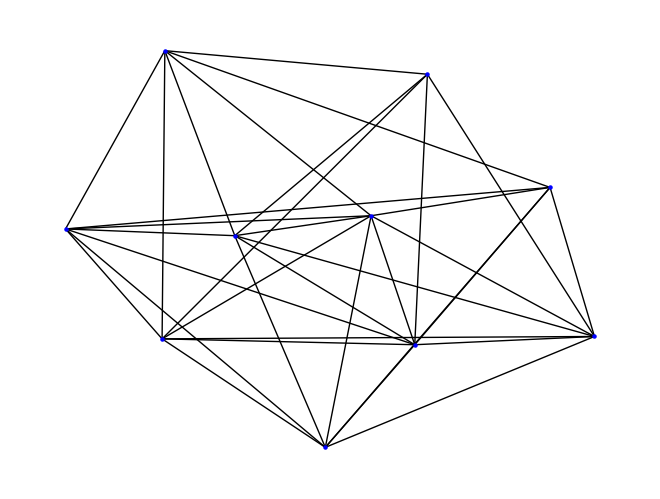

In [7]:
nx.draw(g_1, node_color='blue', node_size=5)
print(g_1.nodes(data=True))
print(g_1.edges(data=True))

## Parallel spreading in mutipual networks with same structure

In [ ]:
import multiprocessing as mp

def spread_simulation(graph, initial_node):
    
    return spreading_result

def run_spreading_simulation(graph, initial_node):
    # Run a single spreading simulation for a given source node
    result = spread_simulation(graph, initial_node)
    return result

def parallel_spreading_simulation(graph, initial_nodes, num_processes):
    # Create a multiprocessing Pool with the desired number of processes
    pool = mp.Pool(num_processes)

    # Generate the arguments for each spreading simulation
    arguments = [(graph, node) for node in initial_nodes]

    # Run spreading simulations in parallel
    results = pool.starmap(run_spreading_simulation, arguments)

    # Close the pool to free resources
    pool.close()
    pool.join()

    return results